# <font color="#30143">Predicción del Precio de Viviendas en California mediante Modelos de Aprendizaje Automático </font>
<br><br>

---
## 1. <font color="#30143">Introducción</font>


En esta investigación, utilizaremos el conjunto de datos *California Housing Prices.csv*, que consta de 20.640 instancias. Cada instancia representa una unidad residencial en el estado de California y contiene 10 atributos, incluyendo la variable objetivo. Los atributos se definen de la siguiente manera:

* longitude : Medida de qué tan al oeste está una unidad residencial; un valor más alto es más al oeste.
* latitude : Medida de qué tan al norte está una unidad residencial; un valor más alto es más al norte.
* housingMedianAge : Edad media de una casa dentro de una unidad residencial; un número más bajo es un edificio más nuevo
* totalRooms : Número total de habitaciones dentro de unidad residencial
* totalBedrooms : Número total de dormitorios dentro de unidad residencial
* population : Número total de personas que residen dentro de unidad residencial
* households : Número total de viviendas en unidad residencial.
* medianIncome : Ingreso medio de los hogares dentro de una unidad residencial (medido en decenas de miles de dólares estadounidenses)
*  medianHouseValue : Valor medio de la casa para los hogares dentro de una unidad residencial (medido en dólares estadounidenses)
* oceanProximity : Ubicación de la una unidad residencial con respecto al océano/mar

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
Cada observación corresponde a una unidad resindecial, conjunto o bloques de viviendas.
</div>

### 1.1 <font color="#30143">Importar Liberías</font>

In [43]:
# Classification Project: Sonar rocks or mines

# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from math import *
from sklearn.linear_model import Ridge, RidgeCV, Lasso



import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

### 1.2 <font color="#30143">Cargar el dataset</font>

El conjunto de datos de _Boston Housing Price._ Puede ver que estamos especificando los nombres cortos para cada atributo para que podamos referenciarlos claramente más adelante. También puede ver que los atributos están delimitados por espacios en blanco en lugar de comas en este archivo e indicamos esto a la función `read_csv()` a través del argumento `delim.whitespace`.

In [2]:
# Importar bibliotecas necesarias
import pandas as pd

df = pd.read_csv("C:/Users/kathy/Desktop/ml/Autoestudio/Udemy/data/housingcaliforia.csv", sep=",")
import pandas as pd
import numpy as np
import statsmodels.api as sm

#df = pd.read_csv('housingcaliforia.csv')#Lectura de datos

df.head()

# Mostrar las primeras filas del conjunto de datos
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

## 2. <font color="#30143">Análisis Descriptivo</font>

Ahora es el momento de estudiar nuestros datos.

### 2.1 <font color="#30143">Dimensión del Conjunto de datos</font>

Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos (columnas) hay en nuestro conjunto de datos con la propiedad `shape`.

In [3]:
# shape
df.shape

(20640, 10)

Puede verse 20.640 instancias y 10 atributos (incluyendo la clase `median_house_value`).

### 2.2 <font color="#30143">Representación del Conjunto de datos</font>

In [4]:
# head
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Podemos ver que las escalas de los atributos están por todas partes debido a las diferentes unidades. Podemos beneficiarnos de algunas transformaciones más adelante, excluyendo los atributos de `longitude`, `latitude`, y `median_house_value`

### 2.3 <font color="#30143">Resumen Estadístico</font>

A continuación, se presenta un resumen de las métricas de estadística descriptiva, que incluye indicadores clave como la media, la desviación estándar, así como los valores mínimos y máximos, entre otros.

In [5]:
# descriptions
pd.set_option('display.precision', 2)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


* longitude: para esta variable tenemos un total de 20,640 observaciones, con una media de -119.57 y desviación estándar de 2, mostrando que las unidades residenciales están ubicadas relativamente cercanas la una de las otras en términos de longitud. Por otro lado, observamos que la longitud mínima es de -124.35 y la máxima de -114.31, coherente con lo planteado en cuento a la cercanía de las unidades residenciales. También podemos indicar que la mitad de las unidades se encuentran ubicadas en una longitud entre el -124.35 y -118.49; dándonos indicios de que lo datos no siguen una distribución normal debido a las diferencias entre la media y la mediana.
   
* latitude: para esta variable tenemos un total de 20,640 observaciones, con una media de 35.63 y desviación estándar de 2.14, mostrando que las unidades residenciales están ubicadas relativamente cercanas la una de las otras en términos de latitud (que en contraste con la variable anterior, se puede decir que las unidades residenciales están concentradas en una misma zona geográfica). Por otro lado, observamos que la latitud mínima es de 32.54  y la máxima de 41.95, coherente con lo planteado en cuento a la cercanía de las unidades residenciales. También podemos indicar que la mitad de las unidades se encuentran ubicadas en una longitud entre el 32.54 y 34.26.
  
* housingMedianAge: la media del promedio de la edad de las casa de los conjunto de viviendas es de 28.64 años; con una desviación estándar de 12.59, lo que nos muestra una distribución bastante amplia; indicando que aprox el 68.2% de la edad media de los conjuntos de viviendas se encuentra entre 16.05 y 41.23; además de un rango de años entre 1 y 52.   

* totalRooms: tenemos que el numero promedio de habitaciones de las unidades residenciales es de 2,635.37, con desviación estándar de 2,181.62; evidenciando una distribución muy amplia, que se refuerza al comprobar que el mínimo dentro de esta variable es de 2 y el máximo de 39,320.00. A partir de esto también se obtiene indicios de un sesgo a la izquierda de la distribución; dada la gran diferencia entre la media y el número máximo de habitaciones por unidad residencial.  
  
* totalBedrooms: por el lado del total de dormitorios la distribución presenta un comportamiento similar al de la variable anterior, probablemente porque esta correlacionadas. Con una media 537.87 y desviación estándar de 421.39.  A partir de esto también se obtiene indicios de un sesgo a la izquierda de la distribución; dada la gran diferencia entre la media y el número máximo de dormitorios por unidad residencial. Esta es la única variable que cuenta con missing values.  
   
* population: en cuanto a la población de las unidades residenciales, en promedio estas cuentan con 1,425 habitantes; con una desviación estándar de 1,132. Lo anterior también en relación con las dos variables precedentes, con un rango amplio entre 3 y 35,682 habitantes. A partir de esto también se obtiene indicios de un sesgo a la izquierda de la distribución; dada la gran diferencia entre la media y el número máximo de habitantes por unidad residencial.  

* households: en relación con las tres variables anteriores se observa un comportamiento similar; que posteriormente se observará en un análisis de correlación. Vemos que em promedio, las unidades residenciales tienen 500 viviendas, con una desviación de 382, indicando una amplitud considerable en la distribución. Con un mínimos de 1 vivienda y máximo de 6,082.

* medianIncome: en cuanto a los ingresos medios de los hogares con un promedio de 38,700 dólares y una desviación estándar de 19,000. Además observamos un mínimo de 5,000  y máximo de 1500,000; dando un rango de distribución bastante amplio; así como un sesgo a la izquierda de la misma.

* medianHouseValue: nuestro target muestra una media de 206,855.82 y desviación estándar de 115,395.62 dólares; mínimo y máximo de 14,999.00 y 500,001.00 respectivamente. Con una distribución amplia, con un sesgo moderado a la izquierda. 


### 2.4 <font color="#30143">Tipo de dato</font>

Podemos ver el tipo de variable de cada atributo con la propiedad `dtypes`.

In [6]:
# types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Podemos ver que todos los atributos en su mayoría son numéricos, en su mayoría valores reales *(float64)* y el atrítubo que define la próximidad al oceano es categórico y tiene 4 niveles y/o etiquetas, las cuales, se pueden observar a continuación:

In [7]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### 2.4 <font color="#30143">Correlación de Atributos</font>

Es importante garantizar la ausencia de relación entre atríbutos, por tal razón lo utilizaremos la función `corr(method='pearson')` para verificar que se cumpla esta condición.

In [8]:
df_cor  = df.drop(columns=['ocean_proximity'])
# correlation
pd.set_option('display.precision', 4)
df_cor.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0000,-0.9247,-0.1082,0.0446,0.0696,0.0998,0.0553,-0.0152,-0.0460
latitude,-0.9247,1.0000,0.0112,-0.0361,-0.0670,-0.1088,-0.0710,-0.0798,-0.1442
housing_median_age,-0.1082,0.0112,1.0000,-0.3613,-0.3205,-0.2962,-0.3029,-0.1190,0.1056
total_rooms,0.0446,-0.0361,-0.3613,1.0000,0.9304,0.8571,0.9185,0.1980,0.1342
total_bedrooms,0.0696,-0.0670,-0.3205,0.9304,1.0000,0.8777,0.9797,-0.0077,0.0497
population,0.0998,-0.1088,-0.2962,0.8571,0.8777,1.0000,0.9072,0.0048,-0.0246
households,0.0553,-0.0710,-0.3029,0.9185,0.9797,0.9072,1.0000,0.0130,0.0658
median_income,-0.0152,-0.0798,-0.1190,0.1980,-0.0077,0.0048,0.0130,1.0000,0.6881
median_house_value,-0.0460,-0.1442,0.1056,0.1342,0.0497,-0.0246,0.0658,0.6881,1.0000


Podemos ver que muchos de los atributos tienen una fuerte correlación (por ejemplo, $>0.75$ o $<−0.75$). Por ejemplo:
* `total_rooms` y `total_bedrooms` con 0.93.
* `total_rooms` y `population` con 0.86.
* `total_bedrooms` y `population` con 0.88.
* `total_rooms` y `households` con 0.91.
* `total_bedrooms` y `households` con 0.98.
* `population` y `households` con 0.91.

### 2.5 <font color="#30143">Valores NaN</font>

In [9]:
missing_values = df.isna().sum()
total_rows = df.shape[0]

missing_vars = missing_values[missing_values > 0]

missing_info_df = pd.DataFrame({
    'Datos faltantes': missing_vars,
    'Porcentaje (%)': round((missing_vars / total_rows) * 100,2)})

missing_info_df

,Datos faltantes,Porcentaje (%)
total_bedrooms,207,1.0


Podemos observar que existen datos faltantes para nuestro atríbuto total_bedromms. Procedemos a realizar imputación a reemplazando los valores NaN por la media.

In [10]:
df2 = df.copy()

df2['total_bedrooms'] = df2['total_bedrooms'].fillna(df2['total_bedrooms'].mean())

Verificamos nuevamente la existencia de datos faltantes a tráves de la función `info()`. 

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB




---

## 3. <font color="#30143">Visualización del Conjunto de datos</font>

A continuación se visualiza las gráficas de cada variable de forma individual.

### 3.1 <font color="#30143"> Histograma y gráfico de densidad</font>

<Axes: xlabel='median_house_value', ylabel='Density'>

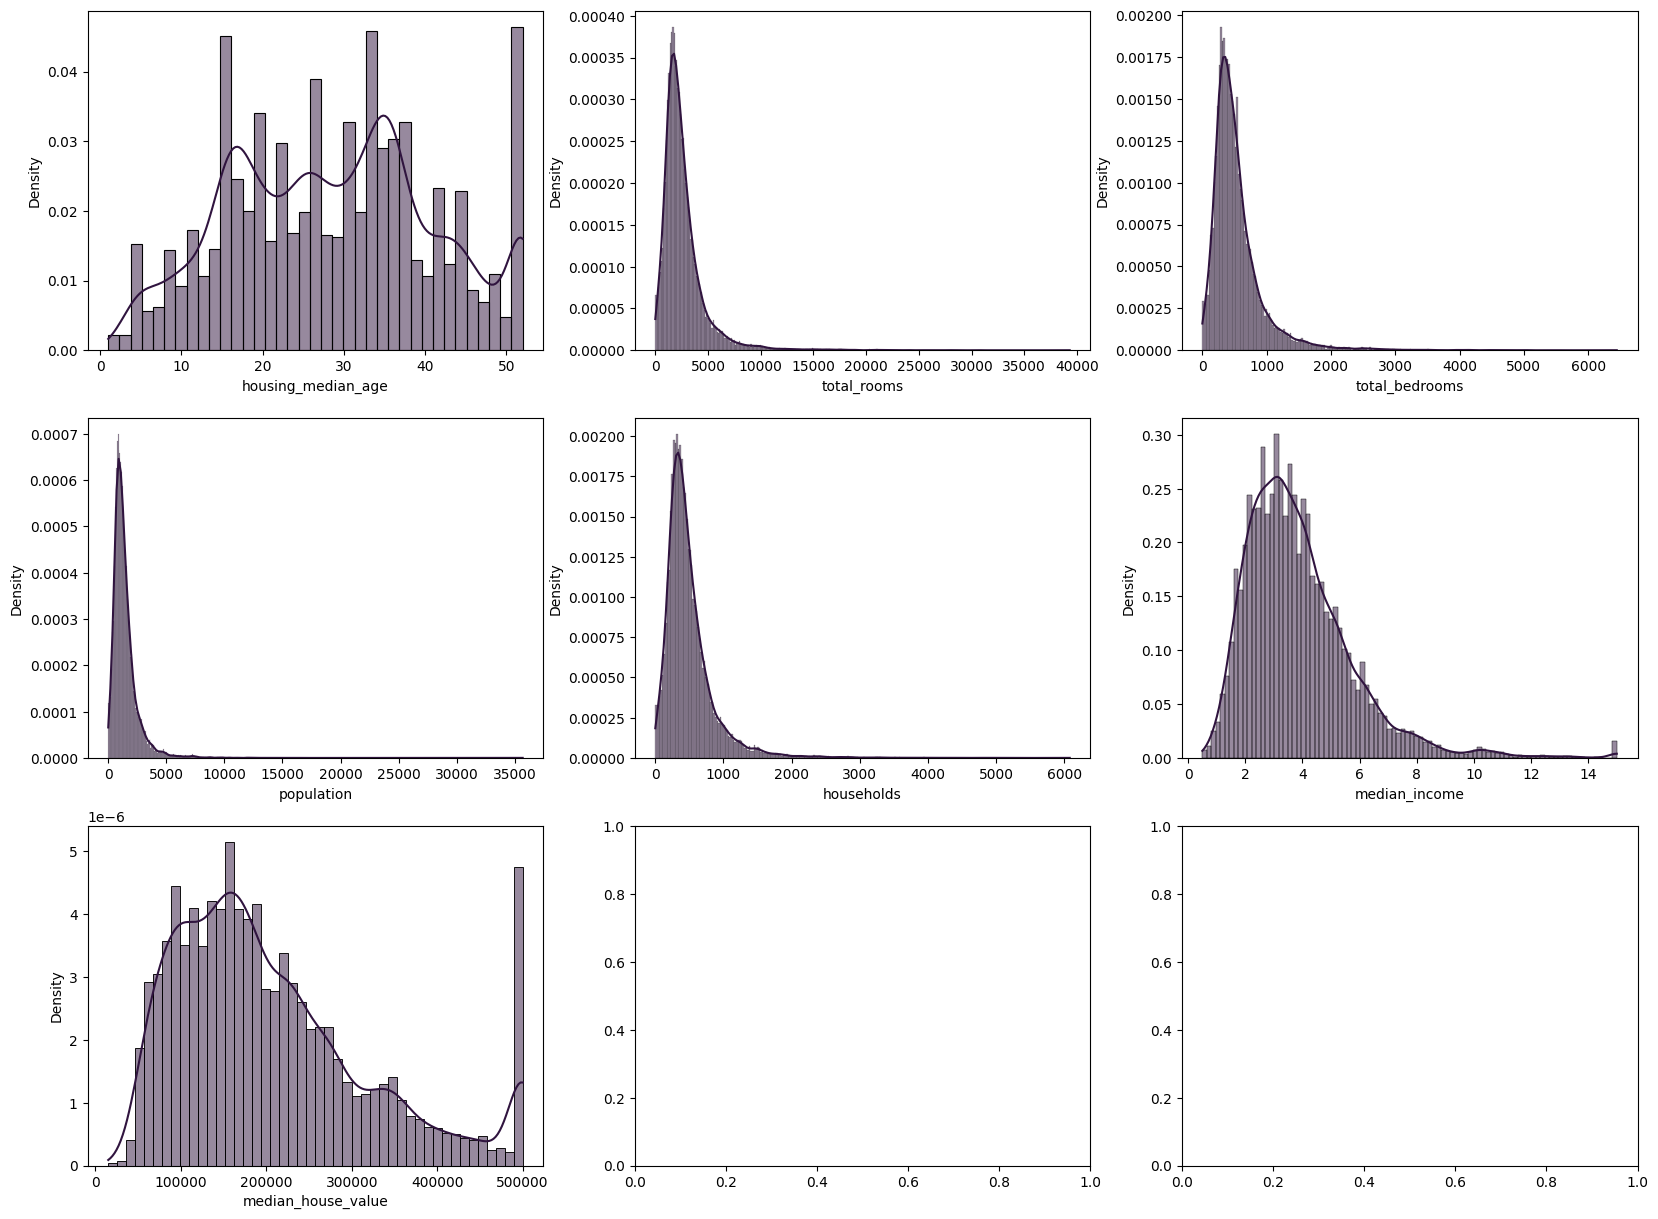

In [12]:
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, ax =plt.subplots(3,3,figsize=(20,15))
sns.histplot(df2["housing_median_age"], ax=ax[0, 0], kde=True, stat="density", color="#30143F")
sns.histplot(df2["total_rooms"], ax=ax[0, 1], kde=True, stat="density", color="#30143F")
sns.histplot(df2["total_bedrooms"], ax=ax[0, 2], kde=True, stat="density", color="#30143F")
sns.histplot(df2["population"], ax=ax[1, 0], kde=True, stat="density", color="#30143F")
sns.histplot(df2["households"], ax=ax[1, 1], kde=True, stat="density", color="#30143F")
sns.histplot(df2["median_income"], ax=ax[1, 2], kde=True, stat="density", color="#30143F")
sns.histplot(df2["median_house_value"], ax=ax[2, 0], kde=True, stat="density", color="#30143F")


### 3.2 <font color="#30143"> Diagrama de Cajas y Bigotes</font>

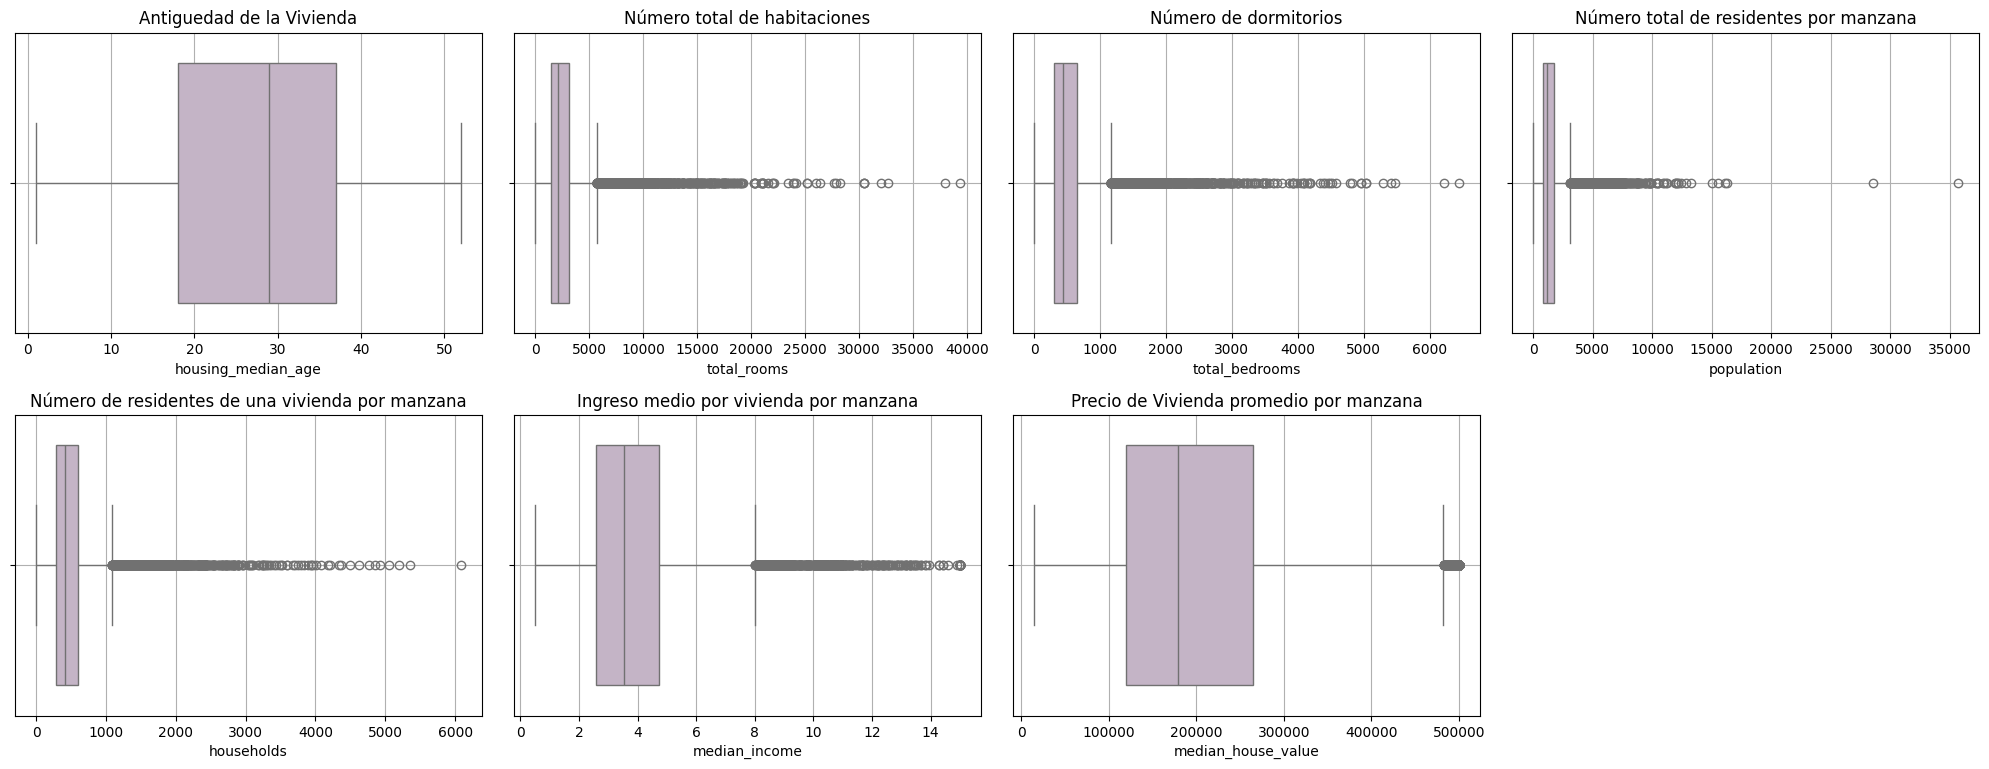

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura la figura general y el tamaño de los subplots
plt.figure(figsize=(20, 15))

# Subplot para housing_median_age
plt.subplot(441)
sns.boxplot(x=df2["housing_median_age"], color="#c6b1c9")
plt.title('Antiguedad de la Vivienda')
plt.grid(True)

# Subplot para total_rooms
plt.subplot(442)
sns.boxplot(x=df2["total_rooms"], color="#c6b1c9")
plt.title('Número total de habitaciones')
plt.grid(True)

# Subplot para total_bedrooms
plt.subplot(443)
sns.boxplot(x=df2["total_bedrooms"], color="#c6b1c9")
plt.title('Número de dormitorios')
plt.grid(True)

# Subplot para population
plt.subplot(444)
sns.boxplot(x=df2["population"], color="#c6b1c9")
plt.title('Número total de residentes por manzana')
plt.grid(True)

# Subplot para households
plt.subplot(445)
sns.boxplot(x=df2["households"], color="#c6b1c9")
plt.title('Número de residentes de una vivienda por manzana')
plt.grid(True)

# Subplot para median_income
plt.subplot(446)
sns.boxplot(x=df2["median_income"], color="#c6b1c9")
plt.title('Ingreso medio por vivienda por manzana')
plt.grid(True)



# Subplot para median_house_value
plt.subplot(447)
sns.boxplot(x=df2["median_house_value"], color="#c6b1c9")
plt.title('Precio de Vivienda promedio por manzana')
plt.grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()




A través del diagrama de cajas y bigotes, además de evidenciar gráficamente lo mostrado en el resumen estadístico, como el sesgo, la simetría de la distribución y las medidas de posición; podemos observar el comportamiento que presentan las variables en cuanto los outliers. En ese sentido, observamos que a excepción de la edad de las casas, los atributos susceptibles a este análisis presentan datos atípicos y de estos últimos; a excepción del valor medio de las viviendas; presentan un número considerable de outliers. 


### 3.3 <font color="#30143"> Diagramas de dispersión</font>

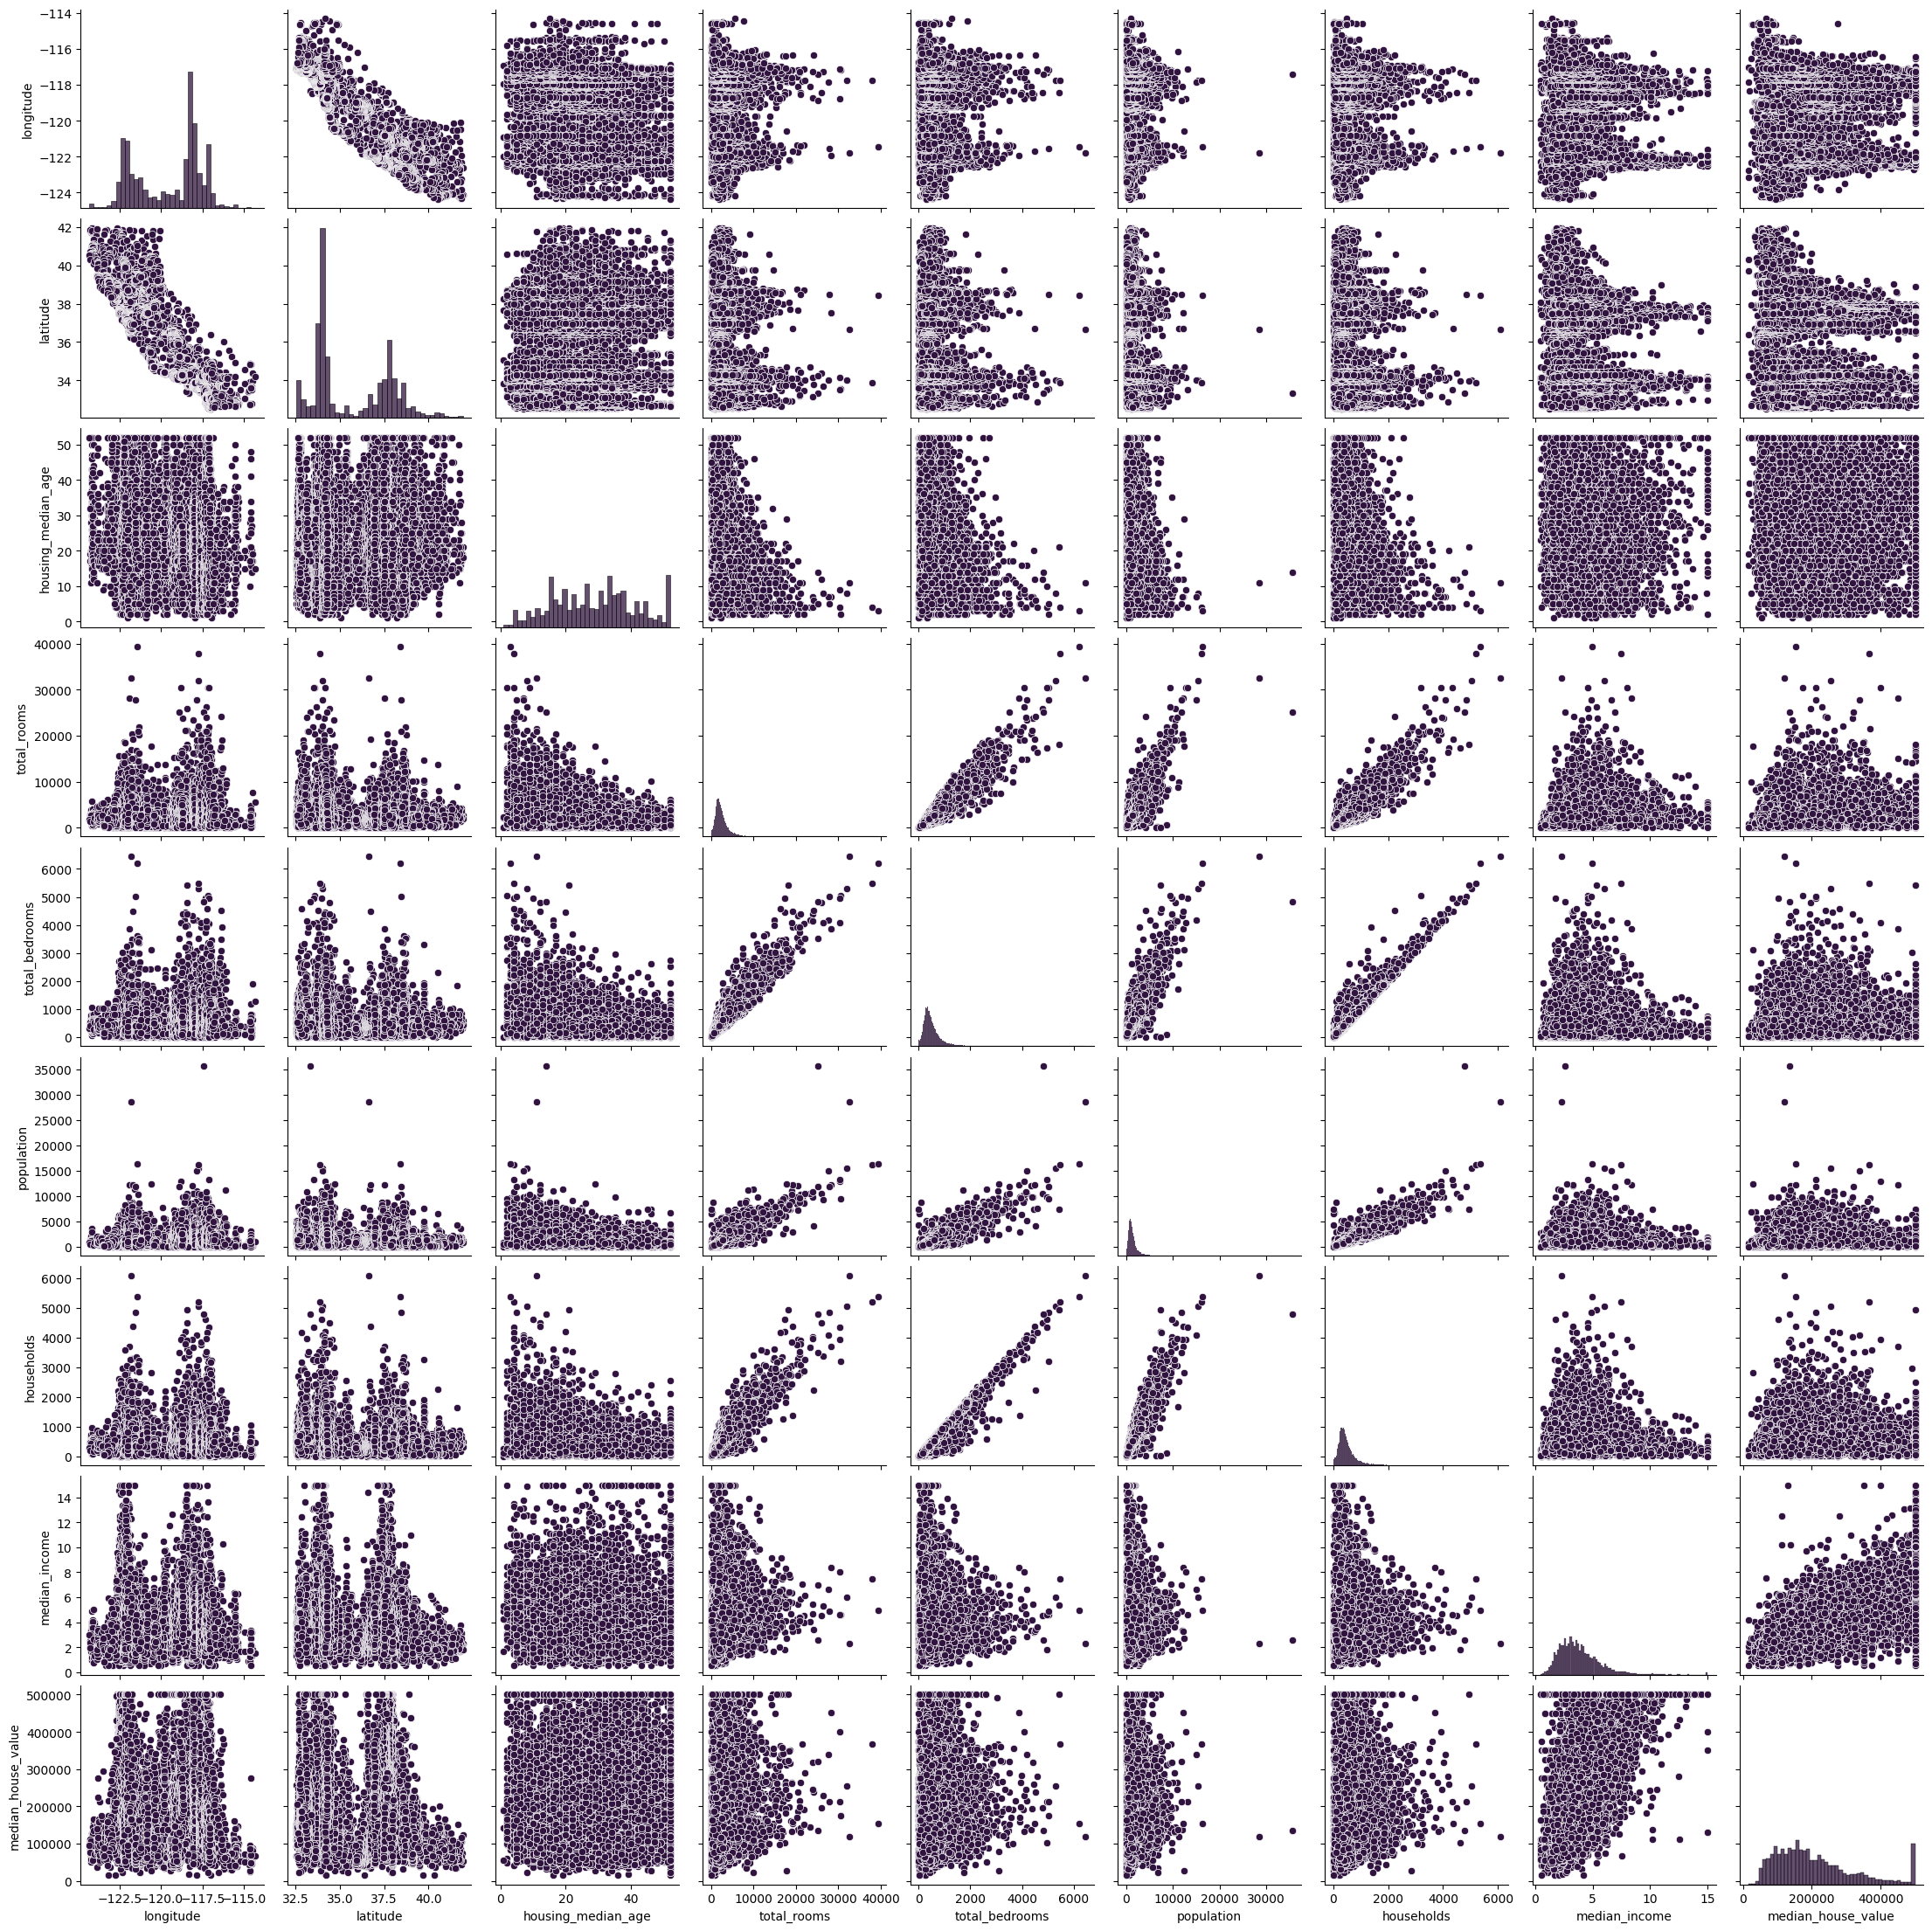

In [14]:
import seaborn as sns
sns.pairplot(df_cor,
             plot_kws={'color': '#30143F'},   # Color de los scatter plots
             diag_kws={'color': '#30143F'})   # Color de los histogramas


### 3.4 <font color="#30143"> Matriz de Correlación</font>

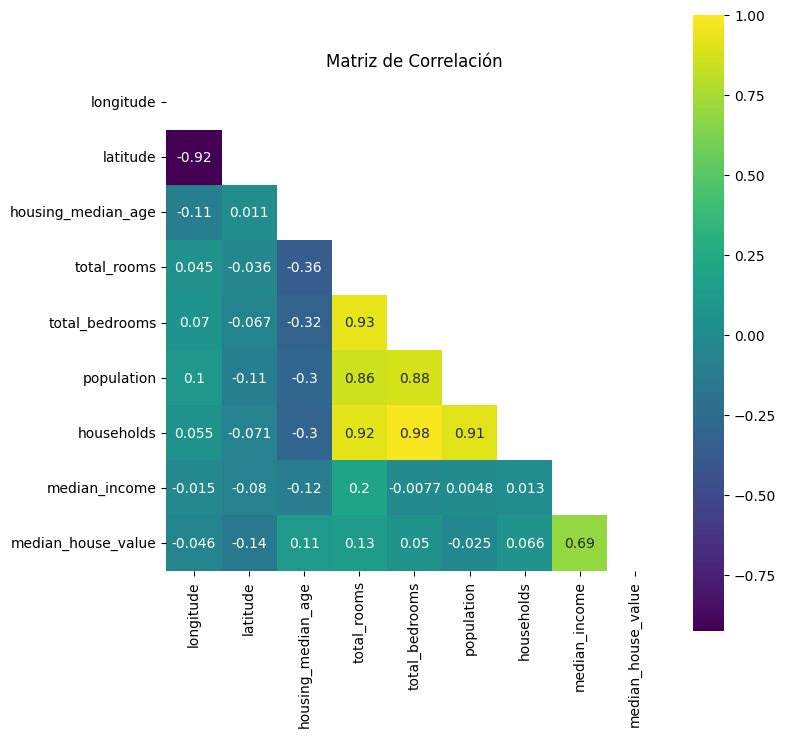

In [15]:
import seaborn as sns

plt.figure(figsize = (8,8))
mask = np.triu(np.ones_like(df_cor.corr(method='pearson'), dtype=bool))
ax = sns.heatmap(df_cor.corr(method='pearson'), vmax = 1, square = True, annot = True,mask=mask, cmap = 'viridis')
plt.title('Matriz de Correlación')
plt.show()


la matriz de correlación nos muestra el grado de asación entre las variables en cuestión, por pares.   

Observamos una alta correlación negativa o inversa entre la latitud y la longitud, sin embargo; por la naturaleza de estas variables no se asocia dicha correlación a un comportamiento de dependencia entre estas.   

En cuanto al total de habitaciones, observamos que presenta correlación directa con el total de dormitorios; guardando correspondencia con el sentido común atendiendo a que en la mayoría de casas; la mitad o más de sus espacios corresponden a dormitorios y por supuesto; a mayor número de habitaciones mayor número de dormitorios. Asimismo, existe correlación directa con la población, guardando coherencia también con la lógica de que entre más habitantes tenga un bloque de residencias, más dormitorios tendrá. Por último, con el número de viviendas, que entre más viviendas tenga la unidad; mayor número de habitaciones s contará en esta.   

El total de dormitorios por su puesto guarda correlación directa con el número de habitantes; en el sentido de la lógica expresada anteriormente. De igual modo con el número total de viviendas por unidad. Por otro lado, observamos correlación entre el ingreso medio de las viviendas de las unidades residenciales y el valor de las viviendas.  


---

## 4. <font color="#30143">Construcción de Modelos</font>

### 4.1 <font color="#30143">Construcción del modelo K-Nearest Neighbors (KNN)</font>

Dividiremos el conjunto de datos cargado en dos, el 70% de los cuales utilizaremos para entrenar nuestros modelos y el 30% como un conjunto de datos de validación y a su vez se define la función `modeloknn()` para calcular las predicciones y métricas de evaluación como RMSE Y $R^2$

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    La estímación de los hiperpárametros que  logran que el modelo alcance su mayor desempeño se realizo aplicando la técnica de validación cruzada a tráves de la función <em>GridSearchCV()</em> con un <em>folds = 3</em>.
</div>


In [44]:

from sklearn.metrics import r2_score
from math import *

############################Definición de Funciones KNN ############################################################################################################################

def modeloknn(df2):

    data = df2.copy()
    datos_knn = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
    datos_knn = datos_knn.astype(int)

    array = datos_knn.values
    X = np.hstack((array[:, 0:8], array[:, 9:12]))  # Ajustar índices según las columnas
    Y = array[:, 8]  # Ajustar índice según la columna de salida
    validation_size = 0.30
    seed = 7
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed, shuffle=True)

    scaler = StandardScaler()
    steps_knn = [("scale", scaler)]

    pipeline_knn = Pipeline(steps_knn)
    x_train_knn = pipeline_knn.fit_transform(X_train)
    x_test_knn = pipeline_knn.transform(X_test)  # garantizamos que los datos de prueba se escalen usando la misma media y desviación estándar que se calcularon a partir del conjunto de entrenamiento.


    # Definir parámetros para GridSearchCV
    parameters = {'n_neighbors': range(1, 20), 'weights': ['uniform', 'distance']}

    # Crear el modelo y ajustar GridSearchCV
    bestmodel_knn = GridSearchCV(KNeighborsRegressor(), parameters, cv=3)
    bestmodel_knn.fit(x_train_knn, Y_train)


    # Predecir utilizando el modelo ajustado y calcular métricas
    y_train_preds = bestmodel_knn.predict(x_train_knn)
    y_test_preds = bestmodel_knn.predict(x_test_knn)

    mse_train = mean_squared_error(Y_train, Y_train)
    rmse_train = sqrt(mse_train)

    mse_test = mean_squared_error(Y_test, y_test_preds)
    rmse_test = sqrt(mse_test)

    # Calcular el R^2
    r2_test = r2_score(Y_test, y_test_preds)
    r2_train = r2_score(Y_train, Y_train)

    
    return rmse_test, rmse_train, y_train_preds, y_test_preds, r2_test, r2_train

In [45]:
#llamado de modelo, entrenamiento de modelo y cálculo de métricas.
rmse_test_knn, rmse_train_knn, y_train_preds_knn, y_test_preds_knn, r2_test_knn, r2_train_knn = modeloknn(df2)

In [46]:
print(f'KNN: RMSE en el conjunto de entrenamiento en {round(rmse_train_knn,2)} USD')
print(f'KNN: RMSE en el conjunto de prueba en {round(rmse_test_knn,2)} USD')
print(f'KNN: R2 en el conjunto de entrenamiento: {round(r2_train_knn*100,2)} %')
print(f'KNN: R2 en el conjunto de prueba: {round(r2_test_knn*100,2)} %')

KNN: RMSE en el conjunto de entrenamiento en 0.0 USD
KNN: RMSE en el conjunto de prueba en 61993.75 USD
KNN: R2 en el conjunto de entrenamiento: 100.0 %
KNN: R2 en el conjunto de prueba: 71.23 %


### 4.2 <font color="#30143">Construcción del modelo Linear Regression (LR)</font>

Definición de función `modelorl()` para calcular las predicciones y métricas de evaluación como RMSE Y $R^2$.

In [19]:
from sklearn.metrics import r2_score
from sklearn import linear_model

############################Definición de Funciones RL ############################################################################################################################

def modelorl(df2):

    data = df2.copy()
    datos_rl = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
    datos_rl = datos_rl.astype(int)

    array = datos_rl.values
    X = np.hstack((array[:, 0:8], array[:, 9:12]))  # Ajustar índices según las columnas
    Y = array[:, 8]  # Ajustar índice según la columna de salida
    validation_size = 0.30
    seed = 7
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed, shuffle=True)

    scaler = StandardScaler()
    steps_rl = [("scale", scaler)]

    pipeline_rl = Pipeline(steps_rl)
    x_train_rl = pipeline_rl.fit_transform(X_train)
    x_test_rl = pipeline_rl.transform(X_test)  # garantizamos que los datos de prueba se escalen usando la misma media y desviación estándar que se calcularon a partir del conjunto de entrenamiento.


    # Crear el modelo y ajustar GridSearchCV
    bestmodel_rl = linear_model.LinearRegression()
    bestmodel_rl.fit(x_train_rl, Y_train)


    # Predecir utilizando el modelo ajustado y calcular métricas
    y_train_preds = bestmodel_rl.predict(x_train_rl)
    y_test_preds = bestmodel_rl.predict(x_test_rl)

    mse_train = mean_squared_error(Y_train, Y_train)
    rmse_train = sqrt(mse_train)

    mse_test = mean_squared_error(Y_test, y_test_preds)
    rmse_test = sqrt(mse_test)

    # Calcular el R^2
    r2_test = r2_score(Y_test, y_test_preds)
    r2_train = r2_score(Y_train, Y_train)

    return rmse_test, rmse_train, y_train_preds, y_test_preds, r2_test, r2_train, bestmodel_rl

In [20]:
#llamado de modelo, entrenamiento de modelo y cálculo de métricas.
rmse_test_rl, rmse_train_rl, y_train_preds_rl, y_test_preds_rl, r2_test_rl, r2_train_rl, bestmodel_rl = modelorl(df2)

In [21]:
print(f'LR: RMSE en el conjunto de entrenamiento en {round(rmse_train_rl,2)} USD')
print(f'LR: RMSE en el conjunto de prueba en {round(rmse_test_rl,2)} USD')
print(f'LR: R2 en el conjunto de entrenamiento: {round(r2_train_rl*100,2)} %')
print(f'LR: R2 en el conjunto de prueba: {round(r2_test_rl*100,2)} %')

LR: RMSE en el conjunto de entrenamiento en 0.0 USD
LR: RMSE en el conjunto de prueba en 70586.2 USD
LR: R2 en el conjunto de entrenamiento: 100.0 %
LR: R2 en el conjunto de prueba: 62.7 %


### 4.3 <font color="#30143">Construcción del modelo Support Vector Machines (SVM)</font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    La estímación de los hiperpárametros que  logran que el modelo alcance su mayor desempeño se realizo aplicando la técnica de validación cruzada a tráves de la función <em>GridSearchCV()</em> con un <em>folds = 2</em>.
</div>

In [22]:
from sklearn.pipeline import make_pipeline

data = df2.copy()
datos_svr = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
datos_svr= datos_svr.astype(int)

array = datos_svr.values
X = np.hstack((array[:, 0:8], array[:, 9:12]))  # Ajustar índices según las columnas
Y = array[:, 8]  # Ajustar índice según la columna de salida


# Crear un pipeline que aplica SVR
pipeline = make_pipeline(SVR())

# Definir el rango de hiperparámetros para el Grid Search
param_grid = {
    'svr__C': [1000, 10000, 100000, 1000000],
    'svr__gamma': ['scale', 'auto']}


# Configurar el Grid Search con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=1)

# Ejecutar el Grid Search
grid_search.fit(X, Y)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Mejores parámetros encontrados: {'svr__C': 1000000, 'svr__gamma': 'scale'}


Definición de función `modeloSVR()` para calcular las predicciones y métricas de evaluación como RMSE Y $R^2$. de acuerdo a los resultados anteriores para cada uno de los `kernel`. 

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

############################Definición de Funciones SVR ############################################################################################################################

def modeloSVR(df2,kernel_input):

    data = df2.copy()
    datos_svr = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
    datos_svr= datos_svr.astype(int)

    array = datos_svr.values
    X = np.hstack((array[:, 0:8], array[:, 9:12]))  # Ajustar índices según las columnas
    Y = array[:, 8]  # Ajustar índice según la columna de salida
    validation_size = 0.30
    seed = 7
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed, shuffle=True)

    scaler = StandardScaler()
    steps_svr = [("scale", scaler)]

    pipeline_svr = Pipeline(steps_svr)
    x_train_svr = pipeline_svr.fit_transform(X_train)
    x_test_svr = pipeline_svr.transform(X_test)  # garantizamos que los datos de prueba se escalen usando la misma media y desviación estándar que se calcularon a partir del conjunto de entrenamiento.


    # Crear el modelo Suppor Vector Machine Regresion
    bestmodel_svr = SVR(kernel= kernel_input , gamma='scale', C=1000000)
    bestmodel_svr.fit(x_train_svr, Y_train)


    # Predecir utilizando el modelo ajustado y calcular métricas
    y_train_preds = bestmodel_svr.predict(x_train_svr)
    y_test_preds = bestmodel_svr.predict(x_test_svr)

    mse_train = mean_squared_error(Y_train, Y_train)
    rmse_train = sqrt(mse_train)

    mse_test = mean_squared_error(Y_test, y_test_preds)
    rmse_test = sqrt(mse_test)

    # Calcular el R^2
    r2_test = r2_score(Y_test, y_test_preds)
    r2_train = r2_score(Y_train, Y_train)

    return rmse_test, rmse_train, y_train_preds, y_test_preds, r2_test, r2_train, bestmodel_svr


### 4.3.1 <font color="#30143">Construcción del modelo SVM usando Kernel Linear</font>

In [24]:
#llamado de modelo, entrenamiento de modelo y cálculo de métricas.
rmse_test_svr_l, rmse_train_svr_l, y_train_preds_svr_l, y_test_preds_svr_l, r2_test_svr_l, r2_train_svr_l, bestmodel_svr_l = modeloSVR(df2,'linear')

In [25]:
print(f'SVM: RMSE en el conjunto de entrenamiento en {round(rmse_train_svr_l,2)} USD')
print(f'SVM: RMSE en el conjunto de prueba en {round(rmse_test_svr_l,2)} USD')
print(f'SVM: R2 en el conjunto de entrenamiento: {round(r2_train_svr_l*100,2)} %')
print(f'SVM: R2 en el conjunto de prueba: {round(r2_test_svr_l*100,2)} %')

SVM: RMSE en el conjunto de entrenamiento en 0.0 USD
SVM: RMSE en el conjunto de prueba en 72280.49 USD
SVM: R2 en el conjunto de entrenamiento: 100.0 %
SVM: R2 en el conjunto de prueba: 60.89 %


### 4.3.2 <font color="#30143">Construcción del modelo SVM usando Kernel Polinomial</font>

In [26]:
#llamado de modelo, entrenamiento de modelo y cálculo de métricas.
rmse_test_svr_p, rmse_train_svr_p, y_train_preds_svr_p, y_test_preds_svr_p, r2_test_svr_p, r2_train_svr_p, bestmodel_svr_P = modeloSVR(df2,'poly') #Grado polinomial por defecto, grado 3

In [27]:
print(f'SVM: RMSE en el conjunto de entrenamiento en {round(rmse_train_svr_p,2)} USD')
print(f'SVM: RMSE en el conjunto de prueba en {round(rmse_test_svr_p,2)} USD')
print(f'SVM: R2 en el conjunto de entrenamiento: {round(r2_train_svr_p*100,2)} %')
print(f'SVM: R2 en el conjunto de prueba: {round(r2_test_svr_p*100,2)} %')

SVM: RMSE en el conjunto de entrenamiento en 0.0 USD
SVM: RMSE en el conjunto de prueba en 85082.99 USD
SVM: R2 en el conjunto de entrenamiento: 100.0 %
SVM: R2 en el conjunto de prueba: 45.81 %


### 4.3.3 <font color="#30143">Construcción del modelo SVM usando Kernel RBF (Radial Basis Function)</font>

In [28]:
#llamado de modelo, entrenamiento de modelo y cálculo de métricas.
rmse_test_svr_rbf, rmse_train_svr_rbf, y_train_preds_svr_rbf, y_test_preds_svr_rbf, r2_test_svr_rbf, r2_train_svr_rbf, bestmodel_svr_rbf = modeloSVR(df2,'rbf')

In [29]:
print(f'SVM: RMSE en el conjunto de entrenamiento en {round(rmse_train_svr_rbf,2)} USD')
print(f'SVM: RMSE en el conjunto de prueba en {round(rmse_test_svr_rbf,2)} USD')
print(f'SVM: R2 en el conjunto de entrenamiento: {round(r2_train_svr_rbf*100,2)} %')
print(f'SVM: R2 en el conjunto de prueba: {round(r2_test_svr_rbf*100,2)} %')

SVM: RMSE en el conjunto de entrenamiento en 0.0 USD
SVM: RMSE en el conjunto de prueba en 58641.05 USD
SVM: R2 en el conjunto de entrenamiento: 100.0 %
SVM: R2 en el conjunto de prueba: 74.26 %


### 4.4 <font color="#30143">Construcción del modelo Lasso</font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    La estímación de los hiperpárametros que  logran que el modelo alcance su mayor desempeño se realizo aplicando la técnica de validación cruzada a tráves de la función <em>GridSearchCV()</em> con un <em>folds = 5</em>.
</div>

In [30]:
data = df2.copy()
datos_svr = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
datos_svr= datos_svr.astype(int)

array = datos_svr.values
X = np.hstack((array[:, 0:8], array[:, 9:12]))  # Ajustar índices según las columnas
Y = array[:, 8]  # Ajustar índice según la columna de salida


# Crear un pipeline que estandariza los datos y aplica Lasso
pipeline = make_pipeline(Lasso())

# Definir el rango de valores para el parámetro alpha
param_grid = {
    'lasso__alpha': np.logspace(-4, 0, 5)  # Valores de alpha desde 0.0001 hasta 1
}

# Configurar el Grid Search con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)

# Ejecutar el Grid Search
grid_search.fit(X, Y)

# Imprimir los mejores parámetros encontrados
print("Mejor valor de alpha:", grid_search.best_params_['lasso__alpha'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejor valor de alpha: 1.0


Definición de función `modelolasso()` para calcular las predicciones y métricas de evaluación como RMSE Y $R^2$.

In [31]:
from sklearn.linear_model import Lasso

def modelolasso(df2):

    data = df2.copy()
    datos_lasso = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
    datos_lasso = datos_lasso.astype(int)

    array = datos_lasso.values
    X = np.hstack((array[:, 0:8], array[:, 9:12]))  # Ajustar índices según las columnas
    Y = array[:, 8]  # Ajustar índice según la columna de salida
    validation_size = 0.30
    seed = 7
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed, shuffle=True)

    scaler = StandardScaler()
    steps_lasso = [("scale", scaler)]

    pipeline_lasso = Pipeline(steps_lasso)
    x_train_lasso = pipeline_lasso.fit_transform(X_train)
    x_test_lasso = pipeline_lasso.transform(X_test)  # garantizamos que los datos de prueba se escalen usando la misma media y desviación estándar que se calcularon a partir del conjunto de entrenamiento.


    # Crear el modelo Lasso
    bestmodel_lasso = Lasso(alpha=1)
    bestmodel_lasso.fit(x_train_lasso, Y_train)


    # Predecir utilizando el modelo ajustado y calcular métricas
    y_train_preds = bestmodel_lasso.predict(x_train_lasso)
    y_test_preds = bestmodel_lasso.predict(x_test_lasso)

    mse_train = mean_squared_error(Y_train, Y_train)
    rmse_train = sqrt(mse_train)

    mse_test = mean_squared_error(Y_test, y_test_preds)
    rmse_test = sqrt(mse_test)

    # Calcular el R^2
    r2_test = r2_score(Y_test, y_test_preds)
    r2_train = r2_score(Y_train, Y_train)

    return rmse_test, rmse_train, y_train_preds, y_test_preds, r2_test, r2_train, bestmodel_lasso

In [32]:
#llamado de modelo, entrenamiento de modelo y cálculo de métricas.
rmse_test_lasso, rmse_train_lasso, y_train_preds_lasso, y_test_preds_lasso, r2_test_lasso, r2_train_lasso, bestmodel_lasso = modelolasso(df2)

In [33]:
print(f'Lasso: RMSE en el conjunto de entrenamiento en {round(rmse_train_lasso,2)} USD')
print(f'Lasso: RMSE en el conjunto de prueba en {round(rmse_test_lasso,2)} USD')
print(f'Lasso: R2 en el conjunto de entrenamiento: {round(r2_train_lasso*100,2)} %')
print(f'Lasso: R2 en el conjunto de prueba: {round(r2_test_lasso*100,2)} %')

Lasso: RMSE en el conjunto de entrenamiento en 0.0 USD
Lasso: RMSE en el conjunto de prueba en 70586.15 USD
Lasso: R2 en el conjunto de entrenamiento: 100.0 %
Lasso: R2 en el conjunto de prueba: 62.7 %


### 4.5 <font color="#30143">Construcción del modelo Ridge</font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    La estímación de los hiperpárametros que  logran que el modelo alcance su mayor desempeño se realizo aplicando la técnica de validación cruzada a tráves de la función <em>GridSearchCV()</em> con un <em>folds = 5</em>.
</div>

In [34]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

data = df2.copy()
datos_ridge = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
datos_ridge= datos_ridge.astype(int)

array = datos_ridge.values
X = np.hstack((array[:, 0:8], array[:, 9:12]))  # Ajustar índices según las columnas
Y = array[:, 8]  # Ajustar índice según la columna de salida


# Crear un pipeline que estandariza los datos y aplica Ridge
pipeline = make_pipeline(Ridge())

# Definir el rango de valores para el parámetro alpha
param_grid = {
    'ridge__alpha': np.logspace(-4, 0, 5)  # Valores de alpha desde 0.0001 hasta 1
}

# Configurar el Grid Search con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)

# Ejecutar el Grid Search
grid_search.fit(X, Y)

# Imprimir los mejores parámetros encontrados
print("Mejor valor de alpha:", grid_search.best_params_['ridge__alpha'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejor valor de alpha: 1.0


Definición de función `modeloridge()` para calcular las predicciones y métricas de evaluación como RMSE Y $R^2$.

In [35]:
from sklearn.linear_model import Ridge

def modeloridge(df2):

    data = df2.copy()
    datos_ridge = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
    datos_ridge = datos_ridge.astype(int)

    array = datos_ridge.values
    X = np.hstack((array[:, 0:8], array[:, 9:12]))  # Ajustar índices según las columnas
    Y = array[:, 8]  # Ajustar índice según la columna de salida
    validation_size = 0.30
    seed = 7
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed, shuffle=True)

    scaler = StandardScaler()
    steps_ridge = [("scale", scaler)]

    pipeline_ridge = Pipeline(steps_ridge)
    x_train_ridge = pipeline_ridge.fit_transform(X_train)
    x_test_ridge = pipeline_ridge.transform(X_test)  # garantizamos que los datos de prueba se escalen usando la misma media y desviación estándar que se calcularon a partir del conjunto de entrenamiento.


    # Crear el modelo Lasso
    bestmodel_ridge = Ridge(alpha=1)
    bestmodel_ridge.fit(x_train_ridge, Y_train)


    # Predecir utilizando el modelo ajustado y calcular métricas
    y_train_preds = bestmodel_ridge.predict(x_train_ridge)
    y_test_preds = bestmodel_ridge.predict(x_test_ridge)

    mse_train = mean_squared_error(Y_train, Y_train)
    rmse_train = sqrt(mse_train)

    mse_test = mean_squared_error(Y_test, y_test_preds)
    rmse_test = sqrt(mse_test)

    # Calcular el R^2
    r2_test = r2_score(Y_test, y_test_preds)
    r2_train = r2_score(Y_train, Y_train)

    return rmse_test, rmse_train, y_train_preds, y_test_preds, r2_test, r2_train, bestmodel_ridge

In [36]:
#llamado de modelo, entrenamiento de modelo y cálculo de métricas.
rmse_test_ridge, rmse_train_ridge, y_train_preds_ridge, y_test_preds_ridge, r2_test_ridge, r2_train_ridge, bestmodel_ridge = modeloridge(df2)

In [37]:
print(f'Lasso: RMSE en el conjunto de entrenamiento en {round(rmse_train_ridge,2)} USD')
print(f'Lasso: RMSE en el conjunto de prueba en {round(rmse_test_ridge,2)} USD')
print(f'Lasso: R2 en el conjunto de entrenamiento: {round(r2_train_ridge*100,2)} %')
print(f'Lasso: R2 en el conjunto de prueba: {round(r2_test_ridge*100,2)} %')

Lasso: RMSE en el conjunto de entrenamiento en 0.0 USD
Lasso: RMSE en el conjunto de prueba en 70586.16 USD
Lasso: R2 en el conjunto de entrenamiento: 100.0 %
Lasso: R2 en el conjunto de prueba: 62.7 %


---

## 5. <font color="#30143">Comparación de rendimiento de modelos</font>

A continuación realizamos la estandarización y división de los datos, de igual forma se define el `scoring` como métrica para la evaluación del rendimiento de cada uno de los modelos aplicados en este informe. 

In [38]:
data = df2.copy()
datos_plot = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
datos_plot = datos_plot.astype(int)

X = datos_plot.drop('median_house_value', axis=1).to_numpy()  # Características
Y = datos_plot['median_house_value'].to_numpy()  # Target

validation_size = 0.30
seed = 7
scoring = 'neg_mean_squared_error'

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed, shuffle=True)

scaler = StandardScaler()
steps_plot= [("scale", scaler)]

pipeline_plot = Pipeline(steps_plot)
x_train_plot = pipeline_plot.fit_transform(X_train)
x_test_plot = pipeline_plot.transform(X_test)  # garantizamos que los datos de prueba se escalen usando la misma media y desviación estándar que se calcularon a partir del conjunto de entrenamiento.

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    A continuación definimos los modelos con cada uno de los <em>hiperparámetros</em> estimados en cada una de las subsecciones del númeral 4 de este documento, para alcanzar su <em>mejor rendimiento</em>.  
</div>

In [39]:
# Definir parámetros para KNN
parameters = {'n_neighbors': 11, 'weights': 'distance'}
model_knn_plot = KNeighborsRegressor(**parameters)

#Definir parámetros para RL
modelo_rl_plot = linear_model.LinearRegression()

#Definir parámetros para SVR linear
modelo_svml_plot = SVR(kernel='linear', gamma='scale', C=1000000)

#Definir parámetros para SVR poly
modelo_svmp_plot = SVR(kernel='poly', gamma='scale', C=1000000)

#Definir parámetros para SVR RBF
modelo_svmrbf_plot = SVR(kernel='rbf', gamma='scale', C=1000000)

#Definir parámetros para Lasso
modelo_lasso_plot = Lasso(alpha=1)

#Definir parámetros para Ridge
modelo_ridge_plot = Ridge(alpha=1)

In [40]:
# Spot Check Algorithms
models = []
models.append(('k-NN', model_knn_plot))
models.append(('RL', modelo_rl_plot))
#models.append(('SVM-Linear', modelo_svml_plot))
#models.append(('SVM-Poly', modelo_svmp_plot))
models.append(('SVM-RBF', modelo_svmrbf_plot))
models.append(('LASSO', modelo_lasso_plot))
models.append(('RIDGE', modelo_ridge_plot))

models

[('k-NN', KNeighborsRegressor(n_neighbors=11, weights='distance')),
 ('RL', LinearRegression()),
 ('SVM-RBF', SVR(C=1000000)),
 ('LASSO', Lasso(alpha=1)),
 ('RIDGE', Ridge(alpha=1))]

Comparemos los modelos, calculando la media y la desviación estándar de MSE para cada uno de éstos.

In [41]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True) #ok
    cv_results = cross_val_score(model, x_train_plot, Y_train, cv=kfold, scoring=scoring, n_jobs=-1) #n_jobs = -1 es oara que el codigo se ejecute mas rapido
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

k-NN: -3,789,568,030.506 (176,265,610.889)
RL: -5,064,941,424.330 (277,181,563.642)
SVM-RBF: -3,350,549,011.353 (190,971,904.490)
LASSO: -5,064,933,681.577 (277,173,868.446)
RIDGE: -5,064,893,969.644 (277,156,843.175)


<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    La estímación de estimación de la media y desviación estándar del error cuadrático medio se realiza a tráves de la función <em>cross_val_score()</em> con un <em>folds = 10</em>, usando como medida de desempeño la métrica <em>neg_mean_squared_error</em>. <br><br>
    Dado que nuestro conjunto de datos cuenta con un número considerable de instancias y además, no se cuenta con un equipo de computo con las carácteristicas necesarias para procesar realizar las estimaciónes antes mencionadas, solo se visualizará a trávez del gráfico de comparación de algoritmos el resultado obtenido para el modelo de kNN, Regresión Lineal, Lasso, Ridge y SVM RBF. 
</div>

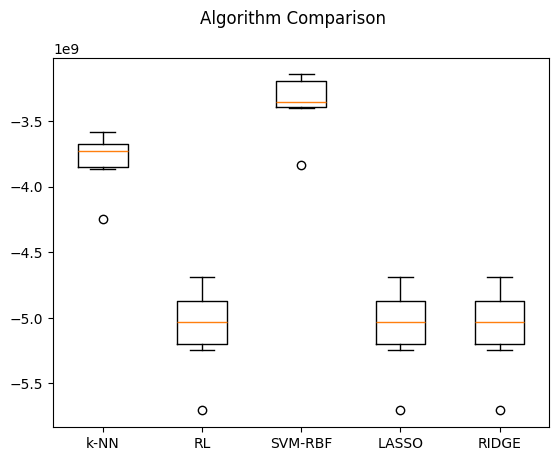

In [42]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
El que más aproximación tiene a cero, es el mejor. De igual forma observamos la distribución de las métricas calculados en los _folds_ de validación cruzada usando <em>Boxplot</em>.  
</div>

---

## 6. <font color="#30143">Conclusiones</font>

Con base en los resultados obtenidos, se concluye que el modelo más efectivo para predecir el precio de una vivienda en California es el **SVM usando Kernel RBF (Radial Basis Function)**, alcanzando un coeficiente de determinación $R^2 = 74.26\%$. Este modelo demuestra una capacidad superior para capturar la complejidad de los datos en comparación con otros enfoques evaluados. En segundo lugar, el modelo **K-Nearest Neighbors (KNN)** logró un $R^2 = 71.23\%$, mostrando también un rendimiento competitivo. Los modelos de regresión lineal presentaron un rendimiento inferior, con un $R^2 < 63\%$. Finalmente, el modelo con el desempeño más bajo fue el **SVM usando Kernel Polinomial**, que obtuvo un $R^2 = 45.81\%$, indicando una menor capacidad para ajustar los datos de manera precisa. 

Cabe aclarar que los resultados anteriores se obtuvieron estimando los hiperpárametros para cada uno de los modelos usando `GridSearchCV()` con `folds`entre 2 y 5, en vez de 10, lo anterior, debido a que los equipos de computo que se usaron para procesar los algoritmos no contaban con la `GPU` necesaria para el óptimo procesamiento de éstos. Lo anterior, es valido teniendo en cuenta que este análisis se realizo para fines académicos. 

A continuación se hace una breve referencia del porque no se usaron otros modelos vistos en el curso de Machine Learing.   

* Arbol de decisión:  Mejor para problemas de clasificación.  
  
* KNN Classifier: Mejor para problemas de clasficiación.  

* Redes neuronales convolucionales: Se utiliza para procesar y clasificar imágenes.  

* Redes neuronales recurrentes: Ideales para series de tiempo.     

* Perceptrón - ADELINE: Podr´ıa no capturar las relaciones no lineales entre las variables conduciendo a subajuste.  

* Multilayer Perceptron: El costo computacional es alto; además, la data en análisis podría no ser lo suficientemente grande para este tipo de modelos.  

* Naive Bayes: Util en problemas de clasificación, su especialidad son los datos categóricos.  


---